In [1]:
# A brief of dataset

In [2]:
'''
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results 
overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been 
largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore,
it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to
try predictive analytics in identifying the employees most likely to get promoted.

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is
around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the
process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the 
required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs 
completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition
to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that 
they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is
to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.
'''

"\nHR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results \noverall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been \nlargely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore,\nit is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to\ntry predictive analytics in identifying the employees most likely to get promoted.\n\nYour client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is\naround identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the\nprocess, they are following is:\n\nThey first identify a set of employees based on recommendations/ past performance\nSelected employees go 

In [3]:
# importing required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer

In [5]:
# loading dataset

In [6]:
hr=pd.read_csv("C://Users//acer//Desktop//1sem//python//HR analytics//train.csv")

In [7]:
# Looking at first few rows

In [8]:
hr.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [9]:
# looking at last few rows

In [10]:
hr.tail(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [11]:
# Listing down all columns

In [12]:
hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [13]:
# Listing all columns data type

In [14]:
hr.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [15]:
# Looking at basis stats value of dataset

In [16]:
hr.describe(include=["int64","float64","object"])

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [17]:
# Looking at null values

In [18]:
hr.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
# chnaging the name of col for easy access

In [20]:
hr.rename(columns={"KPIs_met >80%":"kpi"},inplace=True)

In [21]:
hr.rename(columns={"awards_won?":"awards"},inplace=True)

In [22]:
hr.rename(columns={"previous_year_rating":"rating"},inplace=True)

In [23]:
# Lets look at the new set of columns

In [24]:
hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'rating',
       'length_of_service', 'kpi', 'awards', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [25]:
# Feature engineering : numeric

In [26]:
hr.employee_id.isna().sum()

0

In [27]:
# department: object

In [28]:
hr.department.isna().sum()

0

In [29]:
# Lets encode this column

In [30]:
hr.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [31]:
# since all department are equal we can apply Label encoder here

In [32]:
le=LabelEncoder()
hr["dept"]=le.fit_transform(hr["department"])

In [33]:
pd.DataFrame({"Act":hr["department"].unique(),"encoded":hr.dept.unique()})

,Act,encoded
0,Sales & Marketing,7
1,Operations,4
2,Technology,8
3,Analytics,0
4,R&D,6
5,Procurement,5
6,Finance,1
7,HR,2
8,Legal,3


In [34]:
# Lets delete department column

In [35]:
hr.drop("department",axis=1,inplace=True)

In [36]:
# region: categorical

In [37]:
hr.region.isna().sum()

0

In [38]:
# applying Label encoder here

In [39]:
le=LabelEncoder()
hr["reg"]=le.fit_transform(hr["region"])

In [40]:
pd.DataFrame({"Actual":hr.region.unique(),"Encoded":hr.reg.unique()})

,Actual,Encoded
0,region_7,31
1,region_22,14
2,region_19,10
3,region_23,15
4,region_26,18
5,region_2,11
6,region_20,12
7,region_34,27
8,region_1,0
9,region_4,28


In [41]:
hr.drop("region",axis=1,inplace=True)

In [42]:
# education: categorical

In [43]:
hr.education.isna().sum()

2409

In [44]:
hr["education"]=hr.education.fillna(hr.education.value_counts().index[0])

In [45]:
hr.education.isna().sum()

0

In [46]:
edu={"Below Secondary":0,"Bachelor's":1,"Master's & above":2}
hr.education=[edu[item] for item in hr.education]

In [47]:
# gender: categorical

In [48]:
hr.gender.isna().sum()

0

In [49]:
hr["gender"]=[0 if x=="f" else 1 for x in hr.gender]

In [50]:
hr.gender.unique()

array([0, 1], dtype=int64)

In [51]:
# recruitment_channel

In [52]:
hr.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [53]:
chn={"sourcing":0,"other":1,"referred":2}
hr.recruitment_channel=[chn[item] for item in hr.recruitment_channel]

In [54]:
# no_of_training and age columns are perfect so no need to do anything

In [55]:
# rating

In [56]:
hr.rating.isna().sum()

4124

In [57]:
hr["rating"].fillna(hr["rating"].mean(),inplace=True)

In [58]:
hr.rating.isna().sum()

0

In [59]:
# Rest all columns are good

In [60]:
# Data Visualization

In [61]:
# using countplot

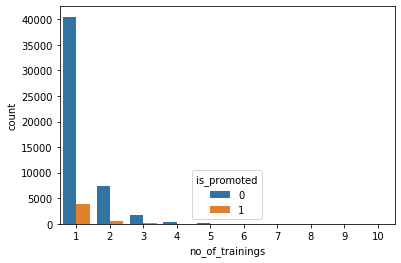

In [62]:
sns.countplot(x="no_of_trainings",hue="is_promoted",data=hr)

In [63]:
# using boxplot

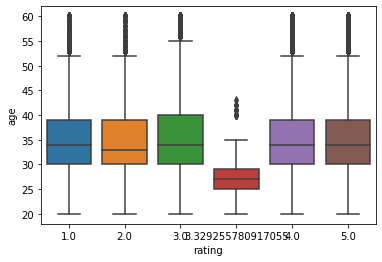

In [64]:
sns.boxplot(x="rating",y="age",data=hr)

In [65]:
# using scatterplot

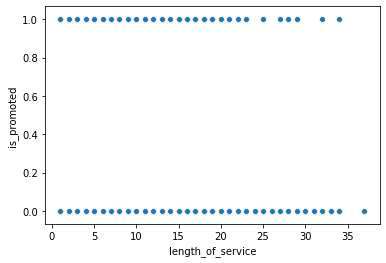

In [66]:
sns.scatterplot(x="length_of_service",y="is_promoted",data=hr)

In [67]:
# histogram

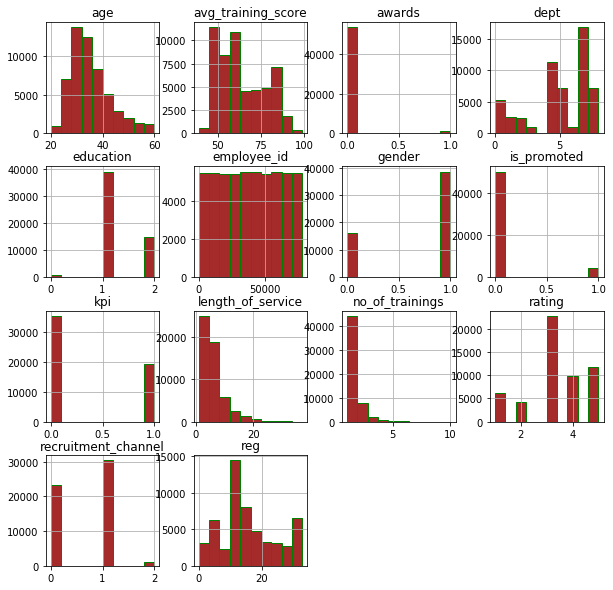

In [68]:
hr.hist(figsize=(10,10),color="brown",edgecolor="green")
plt.show()

In [69]:
# pairplot

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


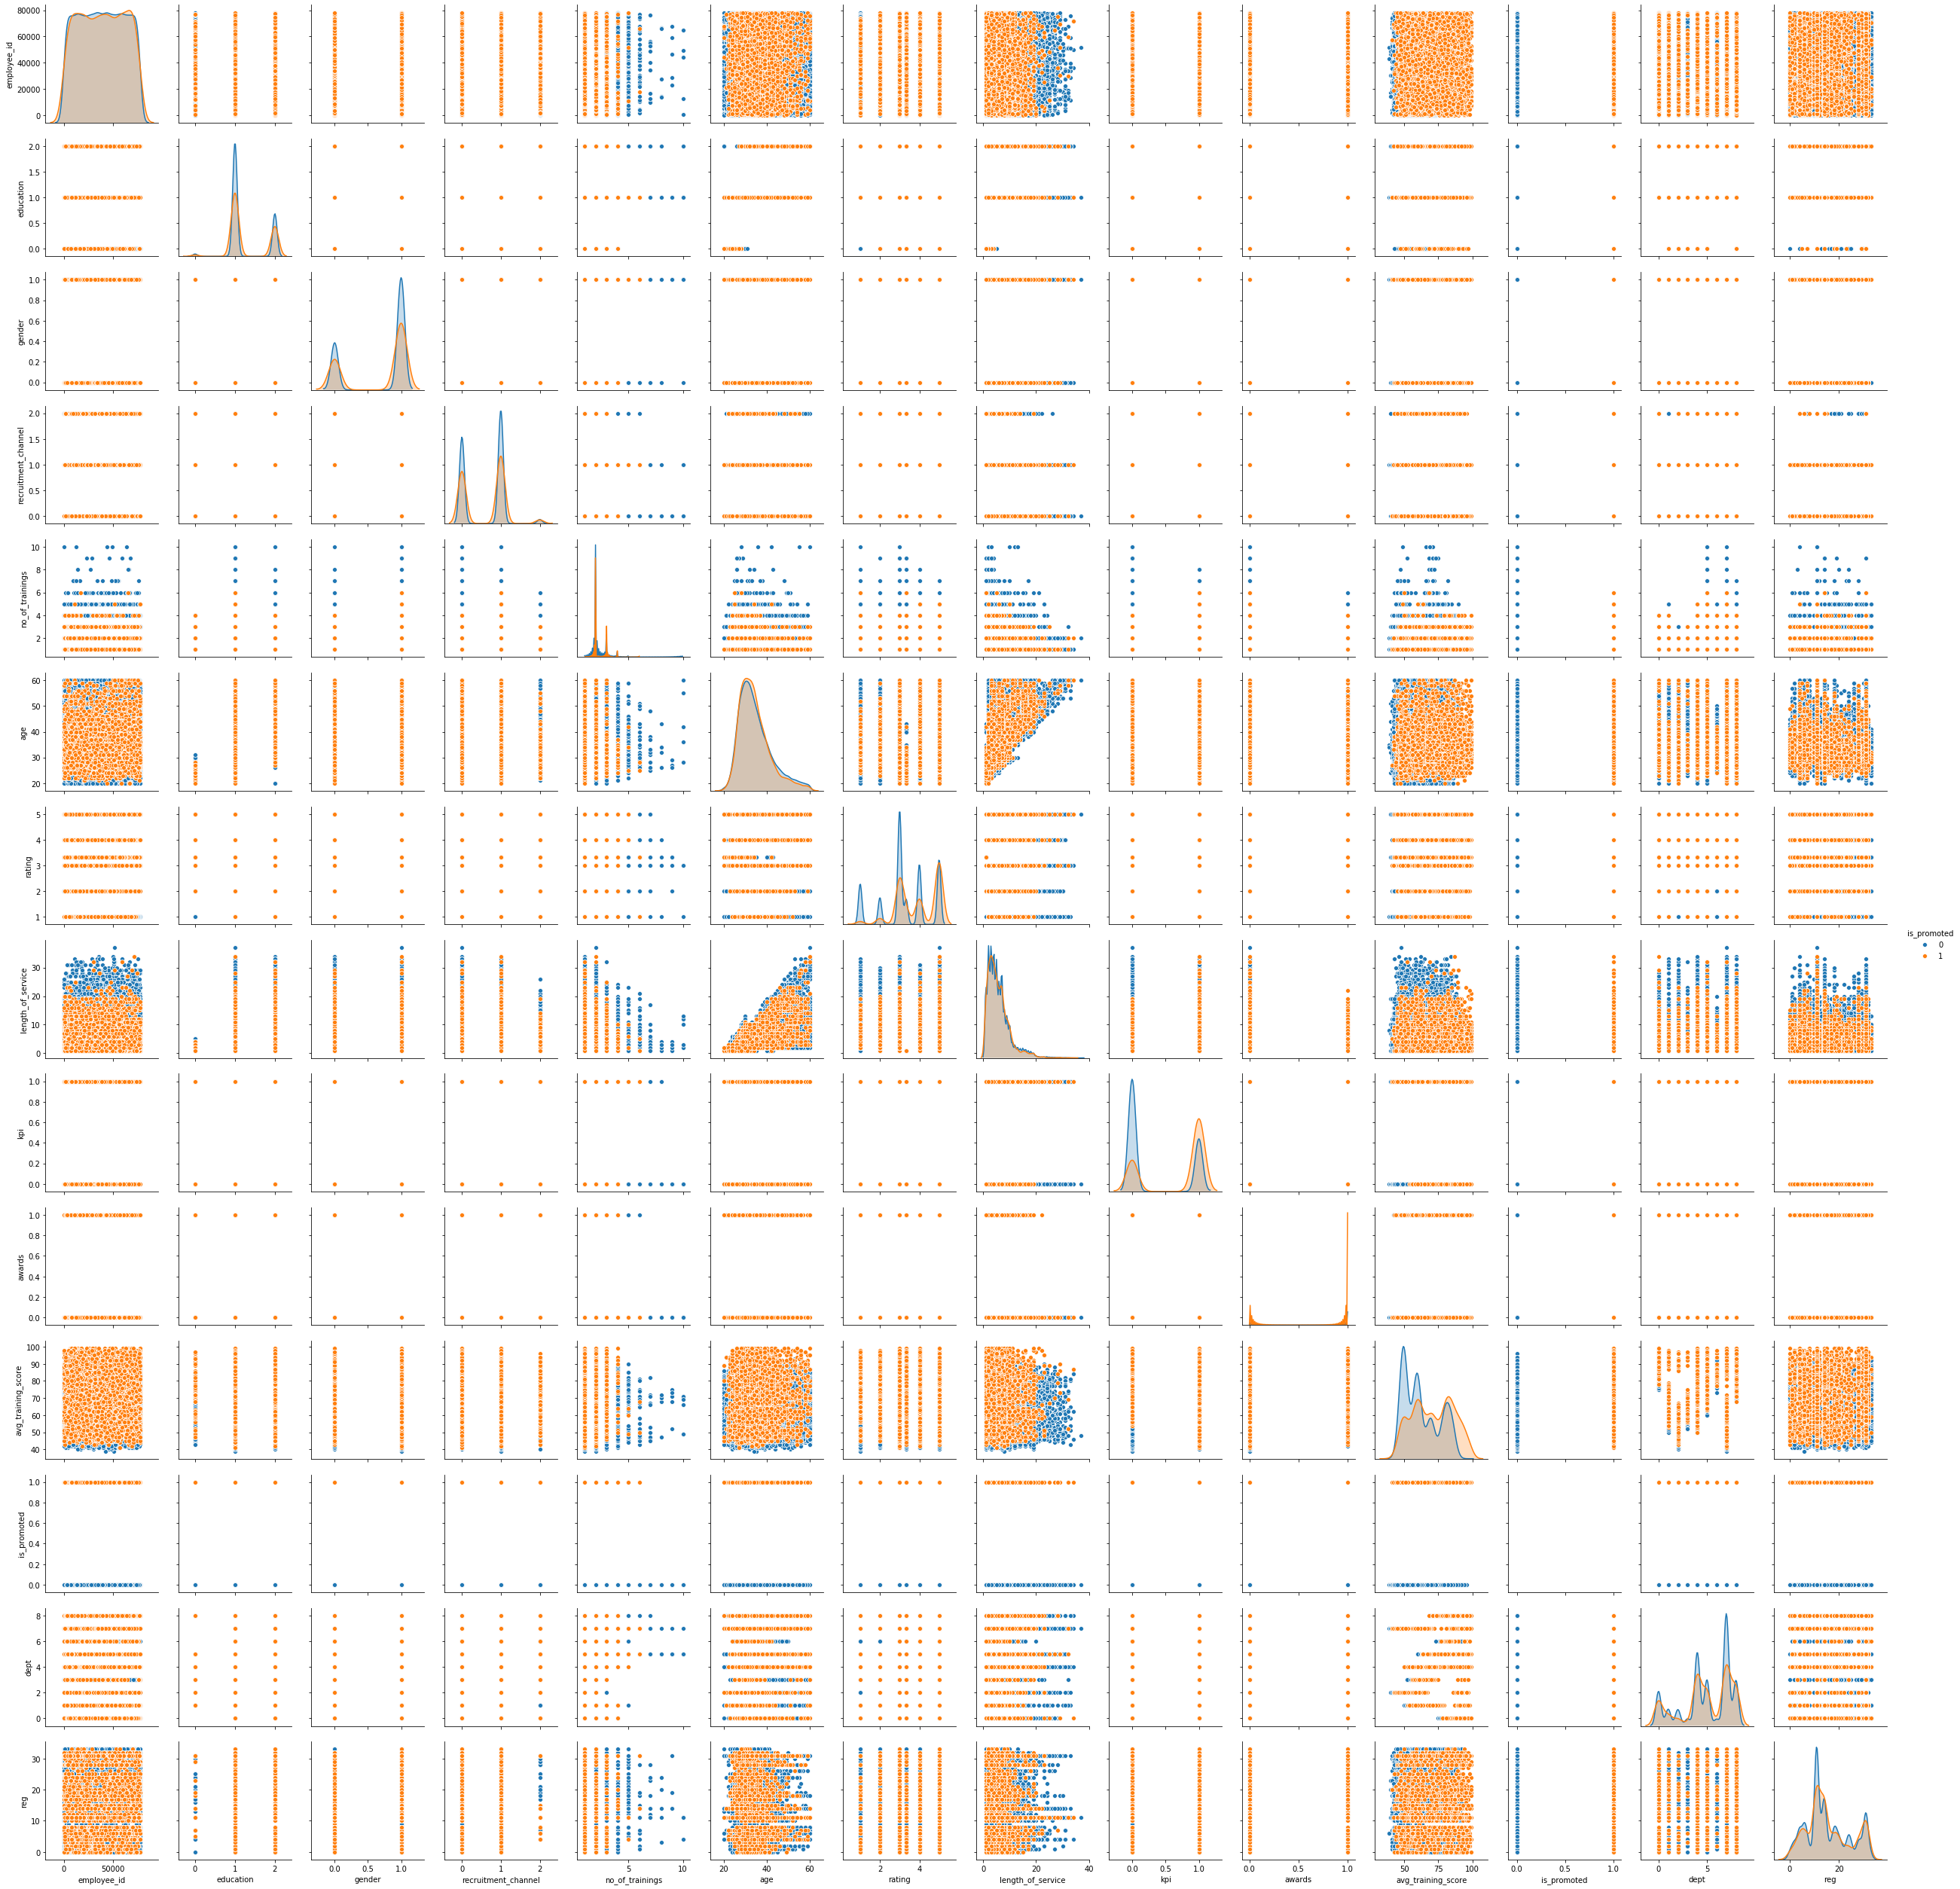

In [70]:
sns.pairplot(hr,hue="is_promoted")

In [71]:
# heatmap

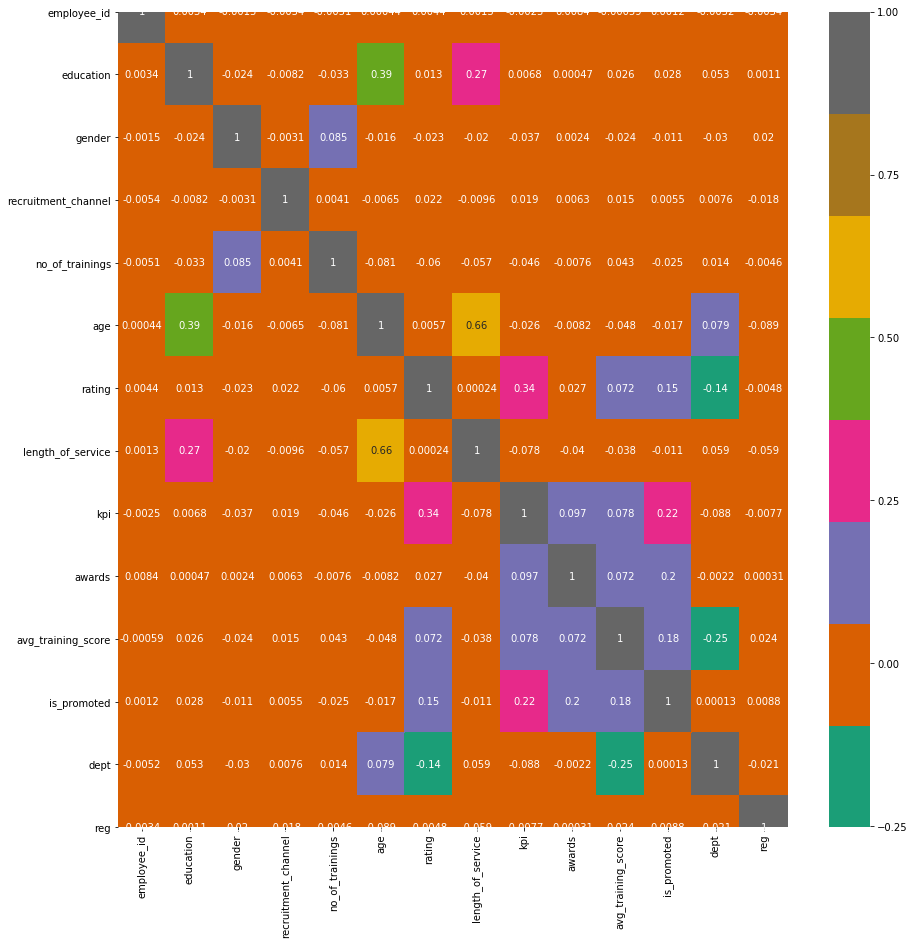

In [72]:
fig=plt.figure(figsize=(15,15))
hr_corr=hr.corr()
sns.heatmap(hr_corr,annot=True,cmap="Dark2")

In [73]:
# scatter_plot

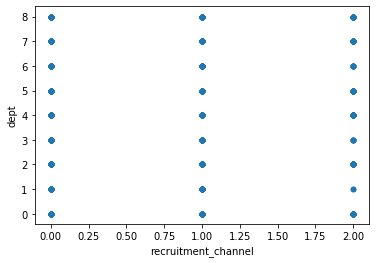

In [74]:
hr.plot(kind="scatter",x="recruitment_channel",y="dept",alpha=0.8)

In [75]:
# barplot

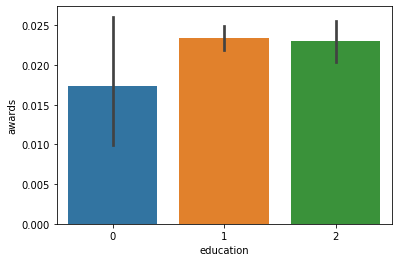

In [76]:
sns.barplot(x="education",y="awards",data=hr)

In [77]:
# Lets divide our dataset into dependent and independent variables

In [78]:
y=hr["is_promoted"]
x=hr.drop("is_promoted",axis=1)

In [79]:
# Dividing further into training and test dataset

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [81]:
# printing the shape of splitted dataset

In [82]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (36721, 13)
shape of y_train is: (36721,)
shape of x_test is: (18087, 13)
shape of y_test is: (18087,)


In [83]:
# Applying ml algorithm

In [84]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
40907       0          0
51939       0          0
6978        0          0
12814       0          0
22921       0          0
...       ...        ...
49375       0          0
47561       0          0
27501       0          0
17196       0          0
41130       0          0

[18087 rows x 2 columns]


In [86]:
# Evaluation of model

In [87]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.9185050035937413
Kappa is : 0.0
Sensitiviy is : 0.0
Precision is : 0.0
R2 score is: -0.08872569674351416
Area under curve is  :0.5
array([[16613,     0],
       [ 1474,     0]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.92      1.00      0.96     16613\n'
 '           1       0.00      0.00      0.00      1474\n'
 '\n'
 '    accuracy                           0.92     18087\n'
 '   macro avg       0.46      0.50      0.48     18087\n'
 'weighted avg       0.84      0.92      0.88     18087\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
# decision tree

In [89]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [90]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
40907       0          0
51939       0          0
6978        0          0
12814       0          0
22921       0          0
...       ...        ...
49375       0          0
47561       0          0
27501       0          0
17196       0          0
41130       0          0

[18087 rows x 2 columns]


In [91]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8943992923093935
Kappa is : 0.3493263849131557
Sensitiviy is : 0.4443690637720488
Precision is : 0.37514318442153494
R2 score is: -0.41076396253738934
Area under curve is  :0.6893488008320305
array([[15522,  1091],
       [  819,   655]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.95      0.93      0.94     16613\n'
 '           1       0.38      0.44      0.41      1474\n'
 '\n'
 '    accuracy                           0.89     18087\n'
 '   macro avg       0.66      0.69      0.67     18087\n'
 'weighted avg       0.90      0.89      0.90     18087\n')


In [92]:
# Random forest

In [93]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [94]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
40907       0          0
51939       0          0
6978        0          0
12814       0          0
22921       0          0
...       ...        ...
49375       0          0
47561       0          0
27501       0          0
17196       0          0
41130       0          0

[18087 rows x 2 columns]


In [95]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.9354232321556919
Kappa is : 0.37508985871851863
Sensitiviy is : 0.2639077340569878
Precision is : 0.8241525423728814
R2 score is: 0.13729198521273778
Area under curve is  :0.6294558233277775
array([[16530,    83],
       [ 1085,   389]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      1.00      0.97     16613\n'
 '           1       0.82      0.26      0.40      1474\n'
 '\n'
 '    accuracy                           0.94     18087\n'
 '   macro avg       0.88      0.63      0.68     18087\n'
 'weighted avg       0.93      0.94      0.92     18087\n')


In [96]:
## Lets apply random forest on our test dataset as this has given us best accuracy

In [97]:
# importing test dataset

In [98]:
hr_test=pd.read_csv("C://Users//acer//Desktop//1sem//python//HR analytics//test.csv")

In [99]:
# looking at first few rows

In [100]:
hr_test.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [101]:
# looking at last few rows

In [102]:
hr_test.tail(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [103]:
# Looking at the null values

In [104]:
hr_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [105]:
# data types

In [106]:
hr_test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [107]:
# we need to feature engineering here before we can predict values

In [108]:
# Lets change the names of columns as we have done in train dataset

In [109]:
hr_test.rename(columns={"KPIs_met >80%":"kpi"},inplace=True)

In [110]:
hr_test.rename(columns={"awards_won?":"awards"},inplace=True)

In [111]:
hr_test.rename(columns={"previous_year_rating":"rating"},inplace=True)

In [112]:
# Lets look at each column closely for better understanding

In [113]:
print(hr_test.employee_id.dtypes)

int64


In [114]:
print(hr_test.employee_id.isna().sum())

0


In [115]:
print(hr_test.department.dtypes)

object


In [116]:
print(hr_test.department.isna().sum())

0


In [117]:
hr_test.department.unique()

array(['Technology', 'HR', 'Sales & Marketing', 'Procurement', 'Finance',
       'Analytics', 'Operations', 'Legal', 'R&D'], dtype=object)

In [118]:
# we can apply label encoding here

In [119]:
le=LabelEncoder()
hr_test["dept"]=le.fit_transform(hr_test["department"])

In [120]:
pd.DataFrame({"Previous values":hr_test.department.unique(),"New values":hr_test.dept.unique()})

,Previous values,New values
0,Technology,8
1,HR,2
2,Sales & Marketing,7
3,Procurement,5
4,Finance,1
5,Analytics,0
6,Operations,4
7,Legal,3
8,R&D,6


In [121]:
# drop department col

In [122]:
hr_test.drop("department",axis=1,inplace=True)

In [123]:
# Region

In [124]:
hr_test.region.dtypes

dtype('O')

In [125]:
len(hr_test.region.unique())

34

In [126]:
# Lets apply label encoding here

In [127]:
le=LabelEncoder()
hr_test["reg"]=le.fit_transform(hr_test["region"])

In [128]:
pd.DataFrame({"Old":hr_test.region.unique(),"New":hr_test.reg.unique()})

,Old,New
0,region_26,18
1,region_4,28
2,region_13,4
3,region_2,11
4,region_29,21
5,region_7,31
6,region_22,14
7,region_16,7
8,region_17,8
9,region_24,16


In [129]:
# Dropping region col

In [130]:
hr_test.drop("region",axis=1,inplace=True)

In [131]:
# Education

In [132]:
hr_test.education.dtypes

dtype('O')

In [133]:
hr_test.education.unique()

array(["Bachelor's", "Master's & above", nan, 'Below Secondary'],
      dtype=object)

In [134]:
hr_test.education.isna().sum()

1034

In [135]:
# imputing mode values in missing data

In [136]:
hr["education"]=hr.education.fillna(hr.education.value_counts().index[0])

In [137]:
hr_test["education"]=hr_test.education.fillna(hr_test.education.value_counts().index[0])

In [138]:
# Applying label encoding but as ordinal data

In [139]:
edu={"Below Secondary":0,"Bachelor's":1,"Master's & above":2}
hr_test.education=[edu[item] for item in hr_test.education]

In [140]:
# gender

In [141]:
hr_test.gender.dtypes

dtype('O')

In [142]:
hr_test.gender.unique()

array(['m', 'f'], dtype=object)

In [143]:
# applying label encoding 

In [144]:
hr_test["gender"]=[0 if x=="f" else 1 for x in hr_test["gender"]]

In [145]:
# recruitment channel

In [146]:
hr_test.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [147]:
chl={"sourcing":0,"referred":2,"other":1}
hr_test.recruitment_channel=[chl[item] for item in hr_test.recruitment_channel]

In [148]:
hr_test.recruitment_channel.isna().sum()

0

In [149]:
# no_of_trainings

In [150]:
hr_test.no_of_trainings.dtypes

dtype('int64')

In [151]:
hr_test.no_of_trainings.isna().sum()

0

In [152]:
hr_test.columns

Index(['employee_id', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'rating', 'length_of_service', 'kpi',
       'awards', 'avg_training_score', 'dept', 'reg'],
      dtype='object')

In [153]:
# age

In [154]:
hr_test.age.dtypes

dtype('int64')

In [155]:
hr_test.age.isna().sum()

0

In [156]:
# rating

In [157]:
hr_test.rating.dtypes

dtype('float64')

In [158]:
hr_test.rating.isna().sum()

1812

In [159]:
hr_test.rating.fillna(hr_test.rating.mean(),inplace=True)

In [160]:
hr_test.rating.isna().sum()

0

In [161]:
# length of service

In [162]:
hr_test.length_of_service.dtypes

dtype('int64')

In [163]:
hr_test.length_of_service.isna().sum()

0

In [164]:
# kpi

In [165]:
hr_test.kpi.dtypes

dtype('int64')

In [166]:
hr_test.kpi.isna().sum()

0

In [167]:
# awards

In [168]:
hr_test.awards.dtypes

dtype('int64')

In [169]:
hr_test.awards.isna().sum()

0

In [170]:
# avg_training score

In [171]:
hr_test.avg_training_score.dtypes

dtype('int64')

In [172]:
hr_test.avg_training_score.isna().sum()

0

In [173]:
# everthing looks perfect till here , lets apply our model on this dataset

In [174]:
rf=RandomForestClassifier()
rf.fit(x,y)
prediction=rf.predict(hr_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [175]:
# lets see predicted values

In [180]:
final_prediction=pd.DataFrame({"employee_id":hr_test.employee_id,"is_promoted":prediction})

In [181]:
print(final_prediction)

       employee_id  is_promoted
0             8724            0
1            74430            0
2            72255            0
3            38562            0
4            64486            0
...            ...          ...
23485        53478            0
23486        25600            0
23487        45409            0
23488         1186            0
23489         5973            1

[23490 rows x 2 columns]


In [182]:
final_prediction.groupby("is_promoted").size()

is_promoted
0    22880
1      610
dtype: int64

In [183]:
# lets export this final result in csv

In [184]:
final_prediction.to_csv("final_submission.csv", index=False)

In [ ]:
# Thank you